# Importing Libraries

In [82]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin



# Reading the DATA

In [3]:
df = pd.read_csv('data/housing.csv')

# Data Exploration, Visualization And Cleaning

In [4]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
254,-122.20,37.77,49.0,2272.0,498.0,1621.0,483.0,2.4338,102400.0,NEAR BAY
18491,-121.58,37.03,16.0,3120.0,685.0,2383.0,681.0,3.5551,198600.0,INLAND
4111,-118.40,34.13,32.0,8262.0,1156.0,2712.0,1125.0,10.5575,500001.0,<1H OCEAN
11187,-117.95,33.83,36.0,1380.0,237.0,690.0,234.0,3.8214,210900.0,<1H OCEAN
3017,-119.40,35.06,21.0,2213.0,458.0,1250.0,440.0,2.9187,52100.0,INLAND
16644,-120.62,35.28,28.0,3952.0,592.0,1469.0,571.0,6.3144,328800.0,NEAR OCEAN
12313,-116.57,33.64,10.0,489.0,82.0,183.0,74.0,6.2702,345500.0,INLAND
6808,-118.10,34.10,29.0,1937.0,448.0,1352.0,433.0,3.8100,234600.0,<1H OCEAN
10105,-117.95,33.92,18.0,2825.0,660.0,1590.0,643.0,3.6106,153600.0,<1H OCEAN
16424,-121.38,37.88,44.0,1158.0,226.0,1094.0,224.0,2.6842,156300.0,INLAND


In [5]:
df.shape

(20640, 10)

In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
f"The null values in total bedrooms take up {(207/df.shape[0]) * 100:.2f}% of the dataset" 

'The null values in total bedrooms take up 1.00% of the dataset'

- Ways to handle null values

    * fill
    * drop
    * fill with condition

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
df.shape

(20433, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [11]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

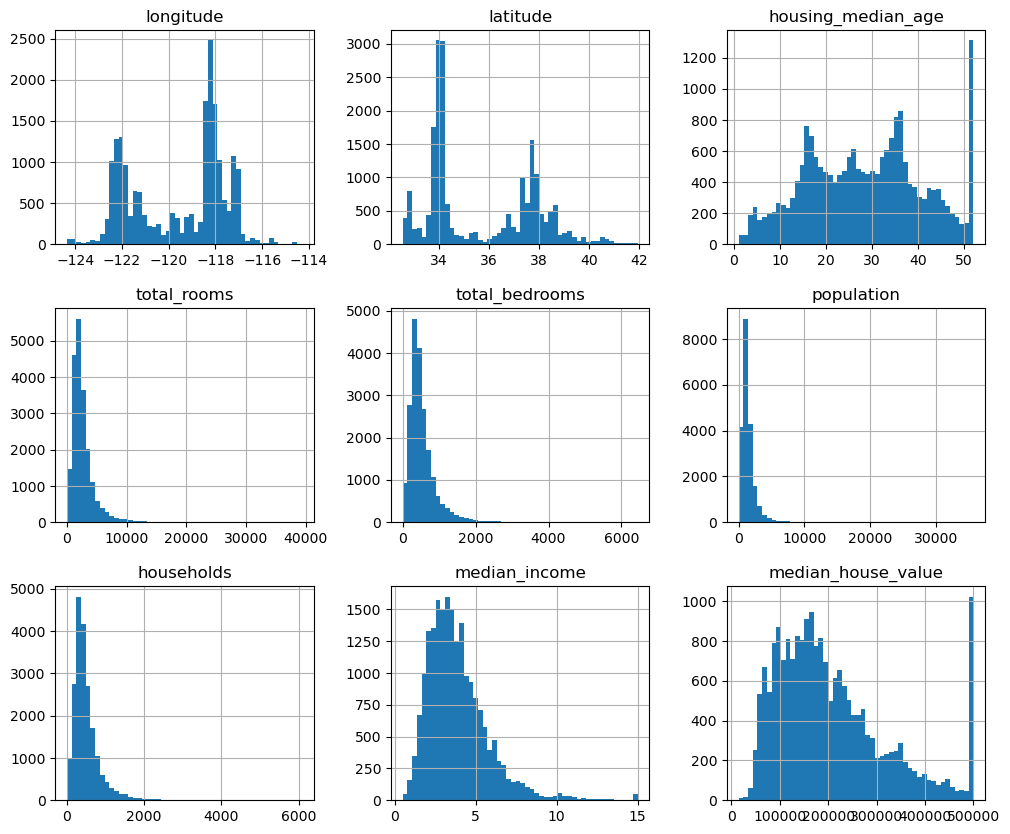

In [13]:
df.hist(bins=50, figsize = (12,10))
plt.show()

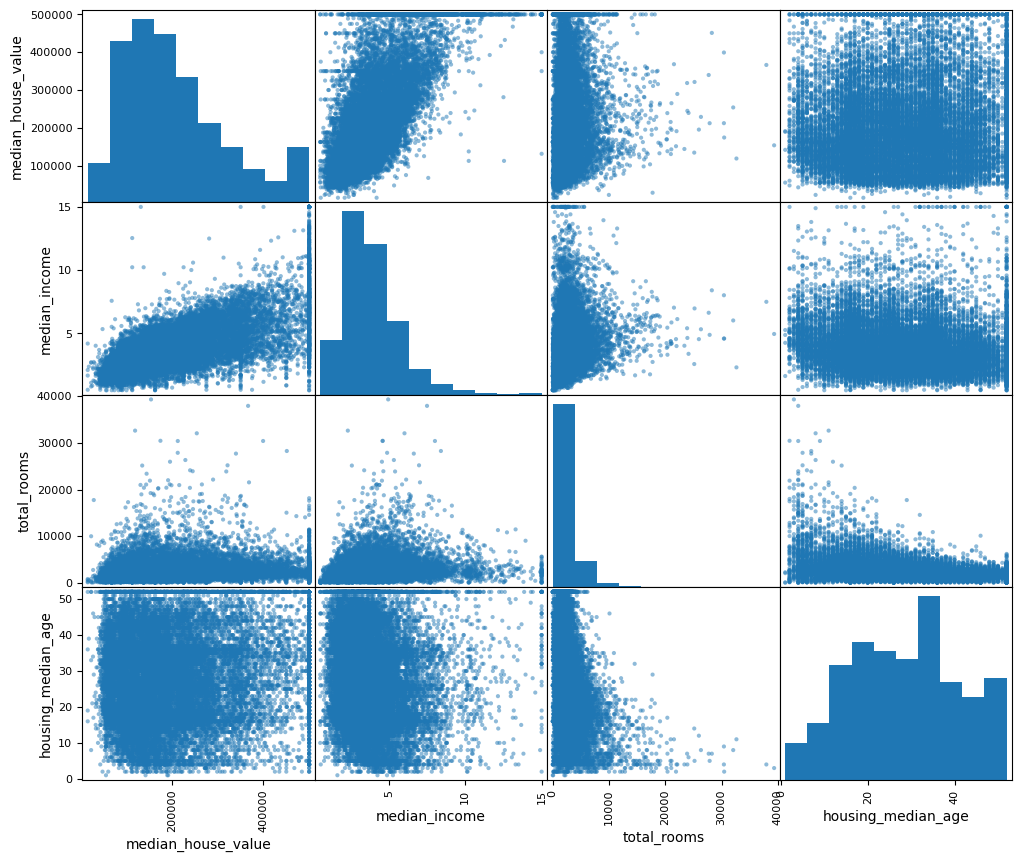

In [26]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df[attributes], figsize=(12,10))
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

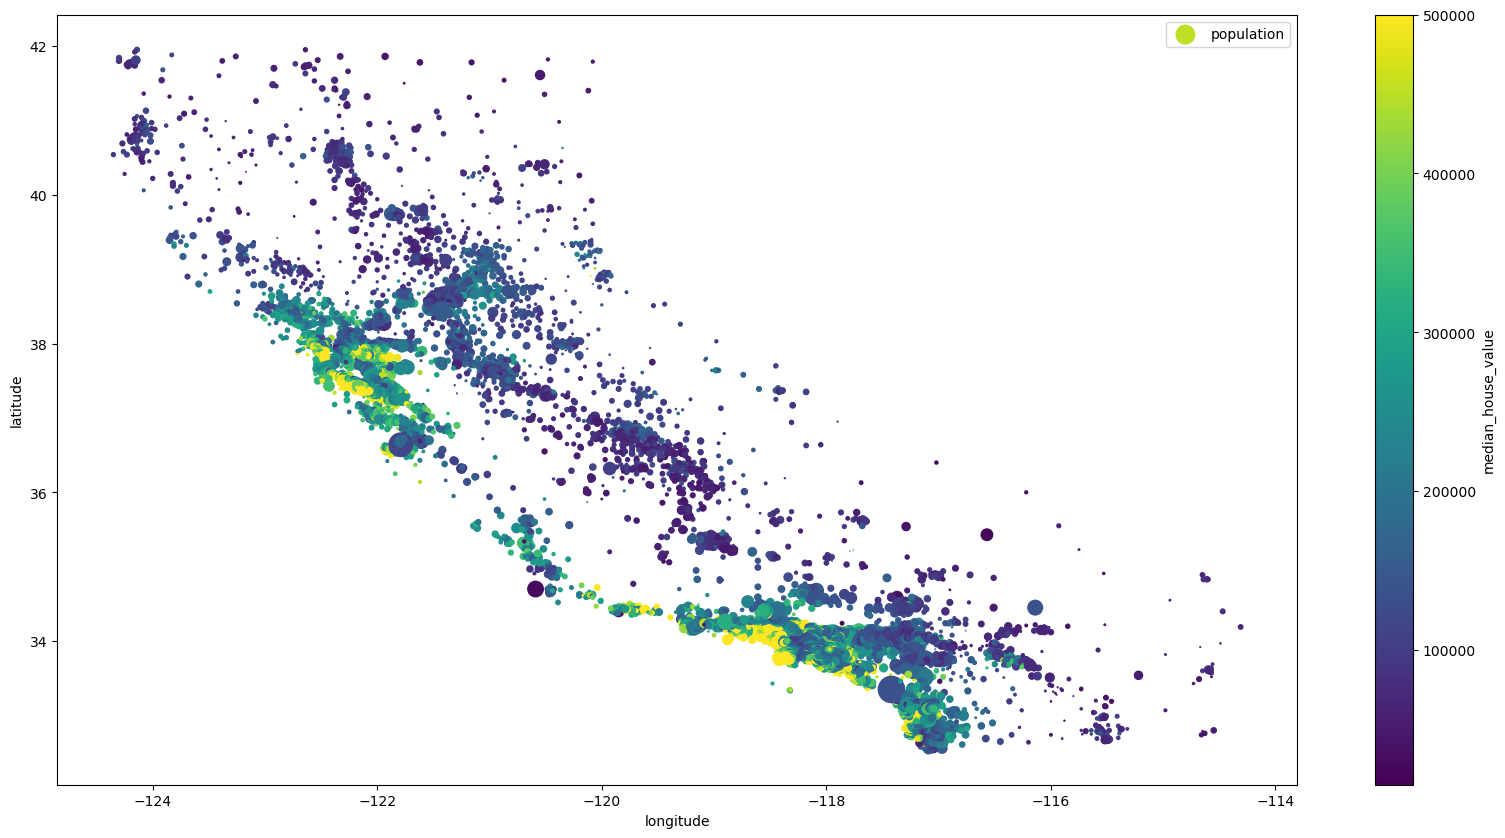

In [22]:
df.plot(kind='scatter', x='longitude', y='latitude', c='median_house_value', s=df['population']/100, label="population", figsize=(20,10))

In [27]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [29]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64

<Axes: >

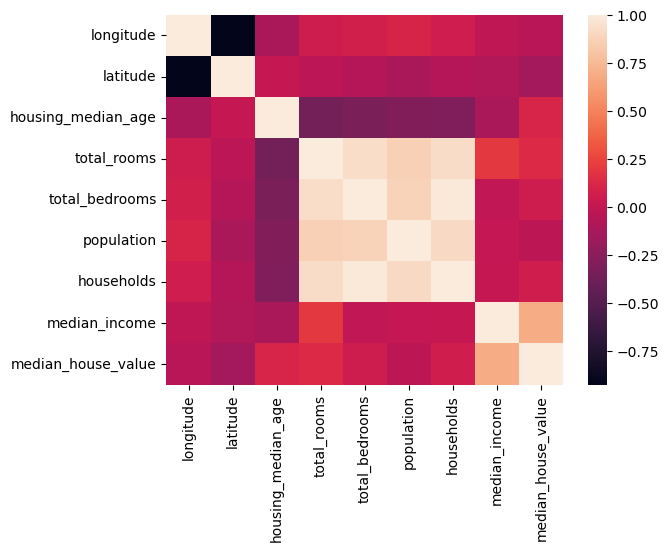

In [30]:
sns.heatmap(corr_matrix)

<Axes: >

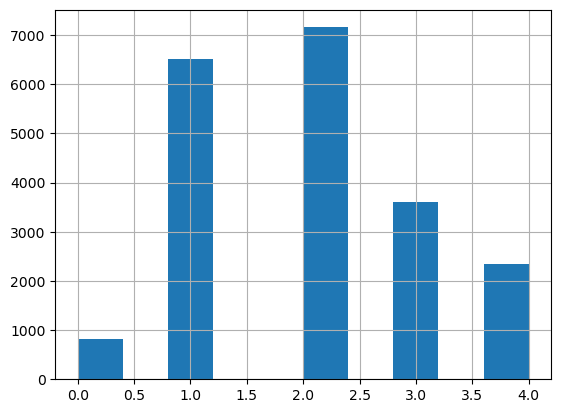

In [35]:
median_income_bin = pd.cut(df['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[0,1,2,3,4])
median_income_bin = median_income_bin.astype('int')
median_income_bin.hist()

# Data Preprocessing

## Splitting Our Data

In [36]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [37]:
X.shape, y.shape

((20433, 10), (20433,))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=median_income_bin)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16346, 10), (4087, 10), (16346,), (4087,))

rooms_per_household, population_per_household, bedrooms_per_room

## Seperating Out Num and Non-Num Columns

In [47]:
num_columns = list(X_train.select_dtypes(include=np.number).columns)
cat_columns = list(X_train.select_dtypes(exclude=np.number).columns)

num_columns, cat_columns

(['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'rooms_per_household'],
 ['ocean_proximity'])

## Feature Engineering

In [59]:
columns = list(X_train.columns)
columns_dict = {
    c:i for c, i in zip(
        columns,
        list(range(len(columns)))
    )
}

columns_dict

{'longitude': 0,
 'latitude': 1,
 'housing_median_age': 2,
 'total_rooms': 3,
 'total_bedrooms': 4,
 'population': 5,
 'households': 6,
 'median_income': 7,
 'ocean_proximity': 8,
 'rooms_per_household': 9}

In [65]:
class CreateAdditionalAttributes(BaseEstimator, TransformerMixin):
    def __init__(self, get_bedrooms_per_room=True):
        self.get_bedrooms_per_room = get_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        population_per_household = X.iloc[:, columns_dict["population"]] / X.iloc[:, columns_dict["households"]]
        rooms_per_household = X.iloc[:, columns_dict["total_rooms"]] / X.iloc[:, columns_dict["households"]]
        if self.get_bedrooms_per_room:
            bedrooms_per_room = X.iloc[:, columns_dict["total_bedrooms"]] / X.iloc[:, columns_dict["total_rooms"]]
            return np.c_[X, population_per_household, rooms_per_household, bedrooms_per_room]
        else:
            return np.c_[X, population_per_household, rooms_per_household]

## Building The Num Pipeline

In [73]:
num_pipeline = Pipeline([
    ('addtional_attributes', CreateAdditionalAttributes()),
    ('std_scaler', StandardScaler())
])

## Building The Full Pipeline

In [76]:
full_pipeline = ColumnTransformer([
    ('num_transformation', num_pipeline, num_columns),
    ('cat_transformation', OrdinalEncoder(), cat_columns)
])

In [78]:
full_pipeline.fit(X_train)

ColumnTransformer(transformers=[('num_transformation',
                                 Pipeline(steps=[('addtional_attributes',
                                                  CreateAdditionalAttributes()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income',
                                  'rooms_per_household']),
                                ('cat_transformation', OrdinalEncoder(),
                                 ['ocean_proximity'])])

## Transforming Our Data